# Analyzing Car Expenses Based on Receipts 

This notebook goes through some interesting stats about how much it has cost us to own a car. Since purchasing the car, I have been saving receipts from all car-related expenses. There are periods where other people have borrowed the car and fueled it up without saving the receipt, so consider this a lower bound on the expenses.

## Table of Contents:
* [Overview: Where Did the Money Go?](#first-bullet)
* [Parking: What's Space Worth Anyways?](#second-bullet)
    * [Seasonality in Parking](#second-bullet-s2)
    * [Who Do We Pay for Parking?](#second-bullet-s3)
* [Gas Prices: Fuelling my Pain!](#third-bullet)
    * [Gas Prices over Time](#third-bullet-s2)
    * [What's the Final Price Tag for Fuel Consumption?](#third-bullet-s3)
    * [Buy Low, Wait High?](#third-bullet-s4)
    * [To the Cheapest Gas Station Please!](#third-bullet-s5)

In [1]:
# Packages
from pathlib import Path
import os
import pandas as pd
import numpy as np
from datetime import datetime

import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

pio.renderers.default = "svg"   ## for showing plotly graphs when uploading notebook to Github

In [2]:
## Setting CWD
cwd = os.getcwd()
root = Path(cwd).parents[0]
datadir = str(Path(root)) + str('/data')
outputdir = str(Path(root)) + str('/output')
print("Root: " + str(root))

Root: /Users/marcosdemetry/Dropbox/IFN/Programming/Python_projects/analyzing_car_expenses


In [3]:
infile = datadir + "/raw_data.xlsx"

df = pd.read_excel(infile, sheet_name='Blad1')

df_bränsle = pd.read_excel(infile, sheet_name='bränsle')

df_bränsle_snittpriser = pd.read_excel(infile, sheet_name='bränsle_snittpriser')

In [4]:
df = df.append(df_bränsle[['Datum','Utgift']], ignore_index=True)      ## Appending relevant fuel data
df['Kategori'].replace(np.nan, 'Bränsle', inplace=True)              ## Fixing Category variable

# Where Did the Money Go?  <a class="anchor" id="first-bullet"></a>

Let's break up the total costs of the car by the category.

In [5]:
print(f"The data contains information on the following categories: {list(df.Kategori.unique())}")

The data contains information on the following categories: ['Månadsavgifter', 'Försäkring', 'Skatt', 'Besiktning', 'Service', 'Parkering', 'Tvätt', 'Övrigt', 'Bränsle']


/Users/marcosdemetry/opt/anaconda3/lib/python3.7/site-packages/requests/__init__.py:91: RequestsDependencyWarning:

urllib3 (1.26.2) or chardet (3.0.4) doesn't match a supported version!



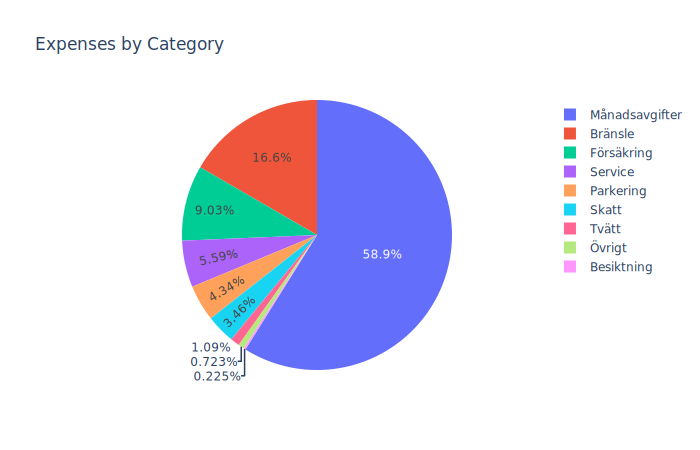

In [6]:
df_kategori = df.groupby('Kategori').sum().reset_index()

fig = px.pie(df_kategori, values='Utgift', names='Kategori', title='Expenses by Category')
fig.show()

In the figure above, we see that the greatest expenses was purchasing the car. This is followed by paying for fuel and insurance.

# Parking: What's Space Worth Anyways?  <a class="anchor" id="second-bullet"></a>

How much have we paid for parking, in total? Let's take a look!

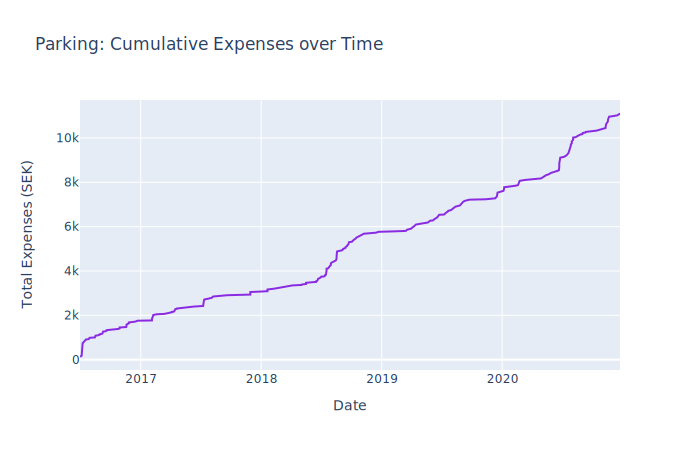

In [7]:
df_parkering = df[df['Kategori']=="Parkering"].reset_index()
df_parkering['Utgift_cumulative'] = df_parkering.loc[::-1, 'Utgift'].cumsum()[::-1]

fig = px.line(df_parkering,
              x='Datum',
              y='Utgift_cumulative',
              title = f'Parking: Cumulative Expenses over Time',
              labels={"Utgift_cumulative": "Total Expenses (SEK)","Datum": "Date"},
              color_discrete_sequence=["blueviolet"])

fig.show()

In [8]:
print(f"Between the {df_parkering.Datum.min().strftime('%d %B %Y')} and {df_parkering.Datum.max().strftime('%d %B %Y')}, {df_parkering.Utgift.count()} parking occasions have cost us a total of {df_parkering.Utgift_cumulative.max()} SEK.")

Between the 01 July 2016 and 23 December 2020, 286 parking occasions have cost us a total of 11103.39 SEK.


## Seasonality in Parking <a class="anchor" id="second-bullet-s2"></a>

What does the daily parking price tag look like?

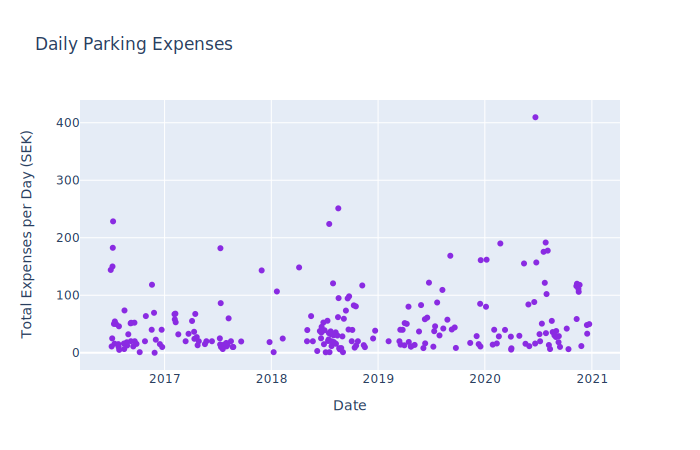

In [9]:
fig = px.scatter(df_parkering[['Datum','Utgift']].groupby('Datum').sum().reset_index(),
              x='Datum',
              y='Utgift',
              title = 'Daily Parking Expenses',
              labels={"Utgift": "Total Expenses per Day (SEK)","Datum": "Date"},
              color_discrete_sequence=["blueviolet"]
             )

fig.show()

### How has my average spending on parking changed over time?

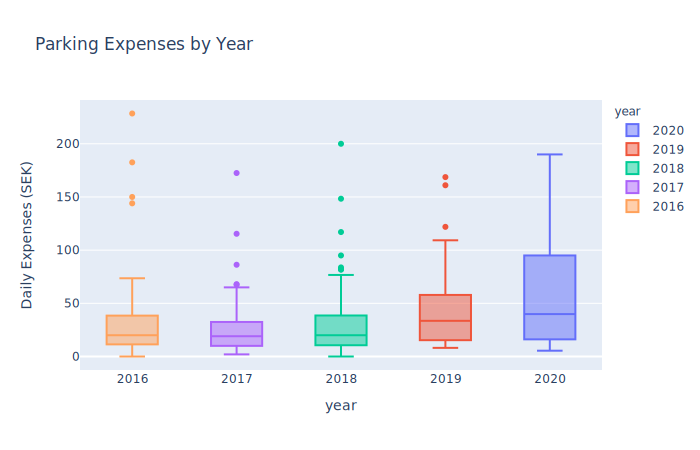

In [10]:
df_parkering['year'], df_parkering['month'] = df_parkering['Datum'].dt.year, df_parkering['Datum'].dt.month

fig = px.box(df_parkering,
             x='year',
             y='Utgift',
             color='year',
             title='Parking Expenses by Year')

fig.update_yaxes(title_text="Daily Expenses (SEK)")

fig.show()

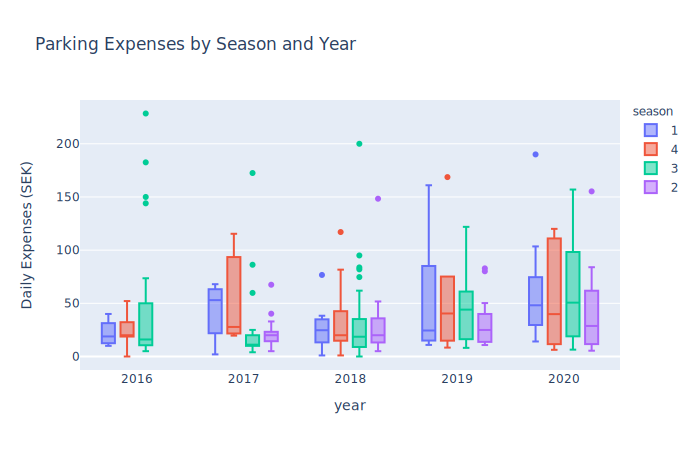

In [11]:
df_parkering['season'] = df_parkering.Datum.dt.month%12 // 3 + 1

fig = px.box(df_parkering,
             x='year',
             y='Utgift',
             color='season',
             title='Parking Expenses by Season and Year')

fig.update_yaxes(title_text="Daily Expenses (SEK)")

fig.show()

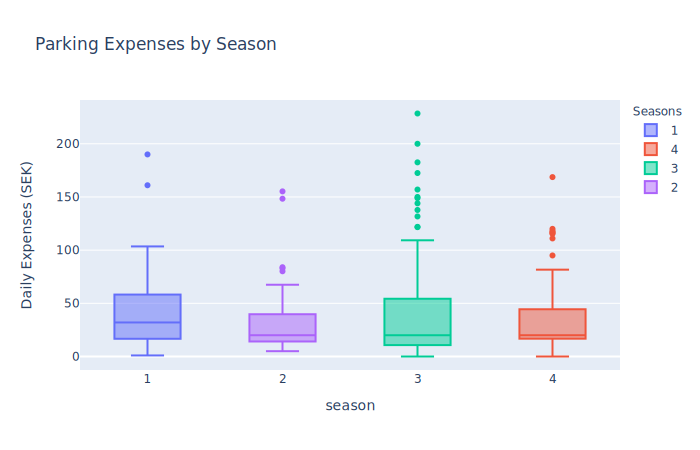

In [12]:
fig = px.box(df_parkering,
             x='season',
             y='Utgift',
             color='season',
             title='Parking Expenses by Season')

fig.update_yaxes(title_text="Daily Expenses (SEK)")
fig.update_layout(legend_title_text='Seasons')

fig.show()

## Who Do We Pay for Parking? <a class="anchor" id="second-bullet-s3"></a>
Let's break down the parking data by parking firm.

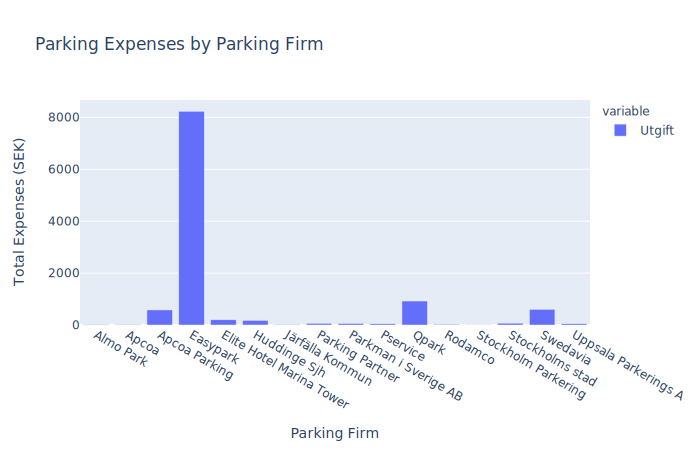

In [13]:
fig = px.bar(df_parkering[['Typ','Utgift']].groupby('Typ').sum(),
             title='Parking Expenses by Parking Firm')

fig.update_yaxes(title_text="Total Expenses (SEK)")
fig.update_xaxes(title_text="Parking Firm")

fig.show()

The winner is: Easypark!

# Gas Prices: Fuelling my Pain! <a class="anchor" id="third-bullet"></a>

In second place in terms of expenses, after paying for the actual car, was paying for fuel. Let's explore the fuel receipts!

## Gas Prices over Time <a class="anchor" id="third-bullet-s2"></a>

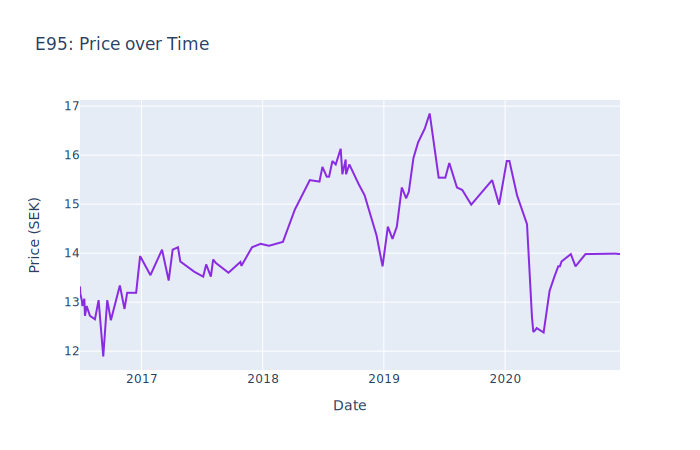

In [14]:
fig = px.line(df_bränsle,
              x='Datum',
              y='Pris',
              title = f'E95: Price over Time',
              labels={"Pris": "Price (SEK)","Datum": "Date"},
              color_discrete_sequence=["blueviolet"])

fig.show()

In [15]:
print(f"The figure above shows that fuel prices have been as low as {df_bränsle.Pris.min()} SEK and reached a maximum of {df_bränsle.Pris.max()} SEK. \nThe latest price is{df_bränsle.Pris.head(1).mean(): .2f} SEK.")

The figure above shows that fuel prices have been as low as 11.89 SEK and reached a maximum of 16.85 SEK. 
The latest price is 13.98 SEK.


How good am I at fueling from price-worthy gas stations? Let's compare the prices from my fuel receipts with average daily prices of fuel in Sweden!

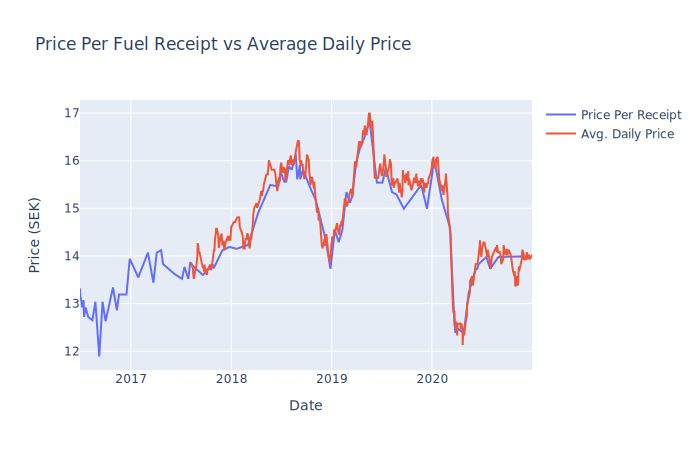

In [16]:
fig = make_subplots()

# Add traces
fig.add_trace(
    go.Scatter(x=df_bränsle['Datum'], y=df_bränsle['Pris'], name="Price Per Receipt")
)

fig.add_trace(
    go.Scatter(x=df_bränsle_snittpriser['Datum'], y=df_bränsle_snittpriser['E95'], name="Avg. Daily Price")
)

# Add figure title
fig.update_layout(
    title_text="Price Per Fuel Receipt vs Average Daily Price"
)

# Set x-axis title
fig.update_xaxes(title_text="Date")

# Set y-axes titles
fig.update_yaxes(title_text="Price (SEK)")

fig.show()

The price at which I fuel the car seems to be consistently equal to or less than the average price of fuel. Not too bad!

## What's the Final Price Tag for Fuel Consumption? <a class="anchor" id="third-bullet-s3"></a>

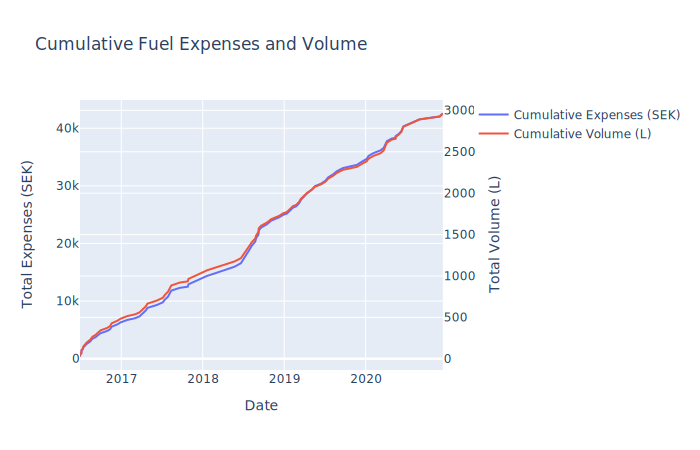

In [17]:
df_bränsle['Utgift_cumulative'] = df_bränsle.loc[::-1, 'Utgift'].cumsum()[::-1]
df_bränsle['L_cumulative'] = df_bränsle.loc[::-1, 'L'].cumsum()[::-1]

fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Scatter(x=df_bränsle['Datum'], y=df_bränsle['Utgift_cumulative'], name="Cumulative Expenses (SEK)"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=df_bränsle['Datum'], y=df_bränsle['L_cumulative'], name="Cumulative Volume (L)"),
    secondary_y=True,
)

# Add figure title
fig.update_layout(
    title_text="Cumulative Fuel Expenses and Volume"
)

# Set x-axis title
fig.update_xaxes(title_text="Date")

# Set y-axes titles
fig.update_yaxes(title_text="Total Expenses (SEK)", secondary_y=False)
fig.update_yaxes(title_text="Total Volume (L)", secondary_y=True)

fig.show()

In [18]:
print(f"The final price tag is{df_bränsle.Utgift_cumulative.head(1).mean(): .2f} SEK, for a total of{df_bränsle.L_cumulative.head(1).mean(): .2f} litres of fuel. \nThat is equivalent to around{df_bränsle.L_cumulative.head(1).mean()/40: .2f} full tanks.")

The final price tag is 42561.83 SEK, for a total of 2962.35 litres of fuel. 
That is equivalent to around 74.06 full tanks.


## Buy Low, Wait High? <a class="anchor" id="third-bullet-s4"></a>

Do I tend to buy more fuel when the prices are relatively low?

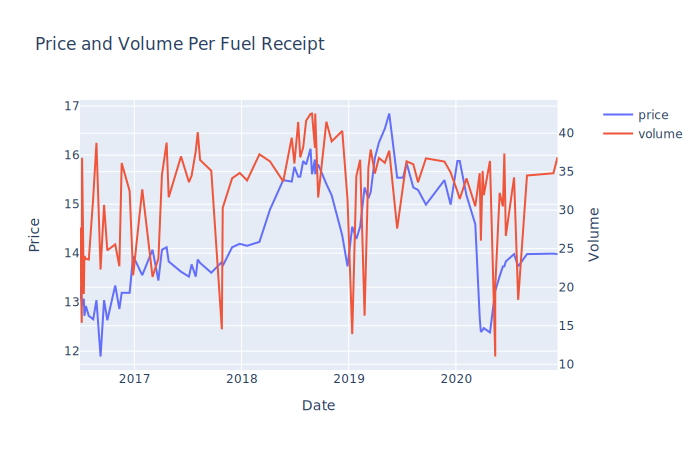

In [19]:
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Scatter(x=df_bränsle['Datum'], y=df_bränsle['Pris'], name="price"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=df_bränsle['Datum'], y=df_bränsle['L'], name="volume"),
    secondary_y=True,
)

# Add figure title
fig.update_layout(
    title_text="Price and Volume Per Fuel Receipt"
)

# Set x-axis title
fig.update_xaxes(title_text="Date")

# Set y-axes titles
fig.update_yaxes(title_text="Price", secondary_y=False)
fig.update_yaxes(title_text="Volume", secondary_y=True)

fig.show()

A quick visual inspection of price and volume data shows that there may be such a negative co-movement until July 2018. Since then, which co-incides with me moving from Uppsala to Stockholm, there isn't a clear pattern. If anything, we fuel up more when prices are higher!

In [20]:
print(f"In summary, between the {df_bränsle.Datum.min().strftime('%d of %B %Y')} and {df_bränsle.Datum.max().strftime('%d of %B %Y')}:\n")
print(f"- Recorded entries: {df_bränsle.Datum.count()}\n")
print(f"- Min. Price: {df_bränsle.Pris.min()} SEK")
print(f"- Avg. Price: {df_bränsle.Pris.mean():.2f} SEK")
print(f"- Max. Price: {df_bränsle.Pris.max()} SEK\n")
print(f"- Min. Fuel Litres: {df_bränsle.L.min()} SEK")
print(f"- Avg. Fuel Litres: {df_bränsle.L.mean():.2f} SEK")
print(f"- Max. Fuel Litres: {df_bränsle.L.max()} SEK\n")

print(f"- Total Expenses: {df_bränsle.Utgift_cumulative.head(1).mean():.2f} SEK")
print(f"- Total Litres: {df_bränsle.L_cumulative.head(1).mean():.2f} SEK\n")

print(f"- Nr Gas Station Chains: {df_bränsle.Företag.nunique()}")

In summary, between the 30 of June 2016 and 12 of December 2020:

- Recorded entries: 92

- Min. Price: 11.89 SEK
- Avg. Price: 14.25 SEK
- Max. Price: 16.85 SEK

- Min. Fuel Litres: 11.0 SEK
- Avg. Fuel Litres: 32.20 SEK
- Max. Fuel Litres: 42.55 SEK

- Total Expenses: 42561.83 SEK
- Total Litres: 2962.35 SEK

- Nr Gas Station Chains: 5


## To The Cheapest Gas Station, Please! <a class="anchor" id="third-bullet-s5"></a>

Which gas station chains do I usually fuel up at, and are they the cheapest?

In [21]:
df_bränsle_grouped = pd.pivot_table(df_bränsle, values='Pris', index=['Datum'],columns='Företag', aggfunc=np.sum).reset_index()
print(f"From the table below, we see that I usually fuel up at Ingo (a total of {df_bränsle_grouped['Ingo'].count()} times).")
print(f"On average, St1 has lower gas prices than the rest ({df_bränsle_grouped['St1'].describe()['mean']:.2f} SEK).")
print(f"However, I used to fuel at St1 when I lived in Uppsala, where fuel is generally cheaper.")

df_bränsle_grouped.describe()

From the table below, we see that I usually fuel up at Ingo (a total of 60 times).
On average, St1 has lower gas prices than the rest (13.85 SEK).
However, I used to fuel at St1 when I lived in Uppsala, where fuel is generally cheaper.


Företag,Circle K,Ingo,OKQ8,Shell,St1
count,9.000000,60.000000,2.000000,1.00,19.000000
mean,14.136667,14.423667,14.555000,26.46,13.848421
std,1.116020,1.176574,1.110158,NaN,1.157076
min,13.070000,12.380000,13.770000,26.46,11.890000
25%,13.320000,13.597500,14.162500,26.46,13.115000
50%,13.830000,14.325000,14.555000,26.46,13.600000
75%,14.070000,15.502500,14.947500,26.46,14.190000
max,16.130000,16.850000,15.340000,26.46,16.260000


Let's compare fuel prices from the gas station chains, based on my saved receipts.

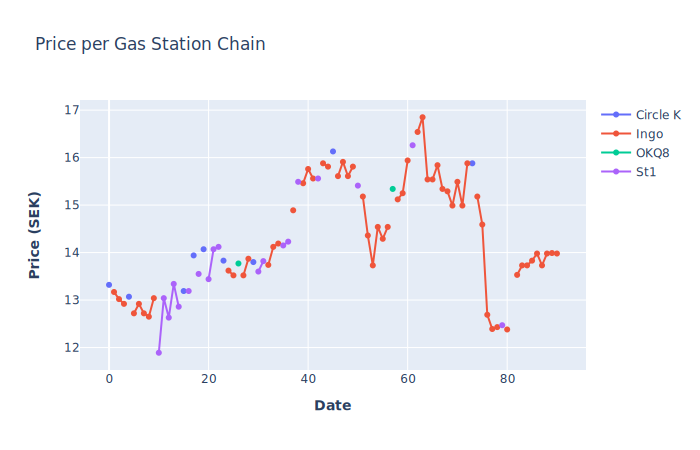

In [22]:
fig = go.Figure()
for col in df_bränsle_grouped[['Circle K','Ingo','OKQ8','St1']].columns:
    fig.add_trace(go.Scatter(x=df_bränsle_grouped.index, y=df_bränsle_grouped[col].values,
                             name = col,
                             mode = 'markers+lines',
                             line=dict(shape='linear')
                             )
                 )
    
fig.update_layout(
    title_text="Price per Gas Station Chain"
)

fig.update_xaxes(title_text="<b>Date</b>")
fig.update_yaxes(title_text="<b>Price (SEK)</b>")

fig.show()

There are many problems with trying to compare fuel prices from the gas chains based on my receipts. First, since I rarely fuel up from multiple gas Stations on the same day, we cannot compare the fuel prices. Second of all, it is not random where I fuel up the car. My favorite chain is Ingo, and I often drive past a couple of other gas stations (which sell fuel at a higher price) on my way there.

## End